# Main Experiments
    refer mainRTain_test.py
    July 21 2025

In [1]:
import os
import numpy as np
import pandas as pd

from datetime import datetime

from datetime import datetime

from Core.models import CModels
from Core.dataset import CDataset, CDatasetWrapper
from Core.plots import CPlots

from mainRTrain_test import Run_RTrain, Run_RV
from Core.tSNE import tSNEPlots, Beth, Kyoto

# Configure Dataset

## <font color='red'> KYOTO </font>

### Configure

In [ ]:
cDATA = 'Kyoto'

objDS = CDataset()

strFileName =  r'../DATA/Kyoto2015DS.csv'
#strPath = os.path.join(strRoot, strFileName)
listData, listLabel = objDS.GetKyotoDataset(strFileName)
print('Kyoto:', listData.shape, listLabel.shape)

fTestSize = 0.9 # Test size for computing models' performance
nEPOCHS = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]
bBethOOS = False

### Add synthetic data

In [ ]:
strSynFileName = '../DATA/Kyoto_Syn_3000.csv'
dfSyn = pd.read_csv(strSynFileName, delimiter=',')
dfSyn['Label'] = 1
print(dfSyn.shape)

listSynLabel = dfSyn['Label'].to_numpy().reshape(-1,1)
print(listSynLabel.shape)

listSynData = dfSyn.drop('Label', axis=1)
print(listSynData.shape)

listData = np.vstack([listData, listSynData])
listLabel = np.vstack([listLabel, listSynLabel])
print('Kyoto:', listData.shape, listLabel.shape)

### Add adversarial data

In [ ]:
strAdvFileName = '../DATA/Kyoto_Adv_3000.csv'
listAdv = np.loadtxt(strAdvFileName, delimiter=',')
print(listAdv.shape, listAdv[:,0:13].shape)

listData = np.vstack((listData, listAdv[:,0:13]))
listLabel = np.vstack((listLabel, listAdv[:,13].reshape(-1,1)))
print('Kyoto:', listData.shape, listLabel.shape)

### TSNE

In [ ]:
objDS = CDataset()
strFileName = r'../DATA/Kyoto2015DS.csv'
df = Kyoto(objDS, strFileName, True)

strOutputFile = './local-data/tsneKyoto_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

#### All 60k Samples

In [ ]:
listDS = np.hstack((listData, listLabel))
print(listDS.shape)

# Here add header to the dataset and also add labels 
dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)


## <font color='red'> BETH </font>

#### <font color='blue'>VARIANT 2: OOS</font>

##### Dataset Info

In [7]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_OOS(strFileName)

CDatasetWrapper Object Created
CDataset Object Created
sus
0    870867
1    156103
dtype: int64
(1026970, 6) (1026970, 1)
Total: (1026970, 6) Training: (856900, 6) Testing: (170070, 6)
(856900, 6) (170070, 6)
[0 1] [855046   1854]
[0 1] [ 15821 154249]


##### Prepare

In [ ]:
cDATA = 'BETH_OOS'

objDS = CDataset()
strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)

print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)

fTestSize = 0.1656035
nEPOCHS = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]
bBethOOS = False

CDataset Object Created
sus
0    870867
1    156103
dtype: int64
Beth: (1026970, 6) (1026970, 1)
Unique labels: [0 1] Counts: [870867 156103]


#### <font color='blue'>VARIANT 1: IS</font>

##### Dataset Info

In [ ]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_IS(strFileName)

##### Prepare

In [8]:
cDATA = 'Beth_IS'

objDS = CDataset()

strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)
print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)

fTestSize = 0.9
nEPOCHS = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]
bBethOOS = False


CDataset Object Created
sus
0    870867
1    156103
dtype: int64
Beth: (1026970, 6) (1026970, 1)
Unique labels: [0 1] Counts: [870867 156103]


#### <font color='blue'>TSNE</font>

In [ ]:
objDS = CDataset()

strFileName = r'../DATA/Beth_16Aug2023.csv'
df = Beth(objDS, strFileName, nExp=1)
df = df.sample(frac=0.1)
print('Sampled: ', df['Labels'].value_counts())

strOutputFile = './local-data/tsneBeth_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

## <font color='red'> MNIST </font>

#### Dataset

In [ ]:
bBethOOS = False


#### TSNE

In [ ]:
cDATA = 'Digit'

objDS = CDataset()
listData, listLabel = objDS.PrepareMNISTDS()
print(listData.shape, listLabel.reshape(-1, 1).shape)

strOutputFile = './local-data/tsneDigit_train.pdf'

listDS = np.hstack((listData, listLabel.reshape(-1, 1)))
print(listDS.shape)

dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)


# <font color='blue'>NEW RUN TEST</font>

## Set Output Path

In [9]:
# Generate output directory
strOutDir = datetime.now().strftime('%Y_%m_%d')
print(strOutDir)
strDirPath = os.path.join(os.getcwd(), 'local-data', cDATA + '_' + strOutDir)
if not os.path.isdir(strDirPath):
    os.makedirs(strDirPath)


2025_10_19


## Run_RTrain

Combination - D:  3 A:  3
CModels Object Created
TrainPercent: [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
Train size Fraction: 0.05
predictDA::DATA_D: #_ 0 (5135, 6) (5135,) [0 1] [4316  819]
predictDA::DATA_A: #_ 0 (5135, 6) (5135,) [0 1] [4313  822]
predictDA::DATA_D: #_ 1 (5135, 6) (5135,) [0 1] [4357  778]
predictDA::DATA_A: #_ 1 (5135, 6) (5135,) [0 1] [4303  832]
predictDA::DATA_D: #_ 2 (5135, 6) (5135,) [0 1] [4304  831]
predictDA::DATA_A: #_ 2 (5135, 6) (5135,) [0 1] [4401  734]
predictDA::DATA_D: #_ 3 (5135, 6) (5135,) [0 1] [4329  806]
predictDA::DATA_A: #_ 3 (5135, 6) (5135,) [0 1] [4377  758]
predictDA::DATA_D: #_ 4 (5135, 6) (5135,) [0 1] [4357  778]
predictDA::DATA_A: #_ 4 (5135, 6) (5135,) [0 1] [4355  780]
predictDA::DATA_D: #_ 5 (5135, 6) (5135,) [0 1] [4311  824]
predictDA::DATA_A: #_ 5 (5135, 6) (5135,) [0 1] [4321  814]
predictDA::DATA_D: #_ 6 (5135, 6) (5135,) [0 1] [4350  785]
predictDA::DATA_A: #_ 6 (5135

<Figure size 640x480 with 0 Axes>

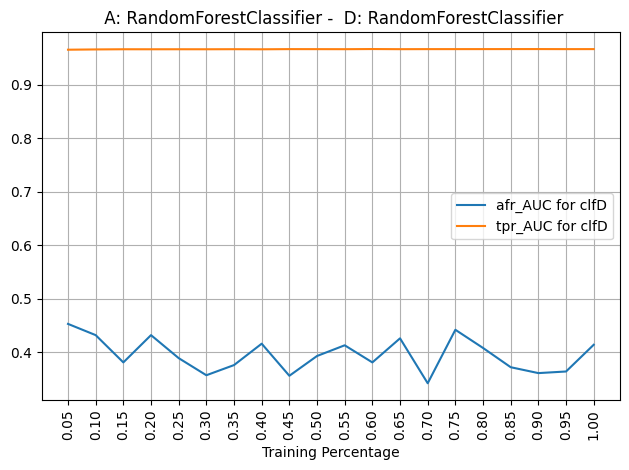

<Figure size 640x480 with 0 Axes>

In [ ]:
Run_RTrain(strDirPath, fTestSize, listSelectedClassifier,
           listData, listLabel, nEPOCHS=nEPOCHS, nSteps=nSteps,
           bBethOOS=bBethOOS)

## <font color='green'>Run_RV</font>

## Load previous results
    Set Local Path - If not a new run

In [ ]:
strDirPath = r'./local-data/Kyoto_2025_07_22'
strDirPath = r'./local-data/Kyoto_2025_08_17'

## If fresh run donot set the above path

In [ ]:
Run_RV(strDirPath, fTestSize, listSelectedClassifier,
        listData, listLabel, nEPOCHS=nEPOCHS, nSteps=nSteps)

# <font color='blue'>Use nbPlotResults to generate final plots</font>